# Neural networks

The fundamentals of neural networks are remarkably simple. But these building blocks can be combined together to make very complex system that have immensive predictive power but are difficult to train and reason with.

That said, they have been at the heart of the incredible success of computer vision and natural language processing in the last decade.

**Learning outcomes**

 - Explain a neuron and a resulting network.
 - Create a small feedforward network from scratch!
 - Use the keras api to train a simple model to classify images
 - You understand the basics of convolutional neural networks.

## Neurons: the fundamental building block

A neuron is really just a function. It has a few components:

 - Inputs - the data going into the neuron
 - Weights - a set of intenal weights (think of these as belonging to the neuron)
 - Activation function - an activation function σ
 
A single neuron can have many inputs. The neuron does a few steps:

1. Takes a weighted sum of the inputs (using its internal weights)
2. Adds an offset (again this is just an internal weight)
3. Passes the sum of all the inputs and the offset through some activation function
4. You've got your output!

![neuron](assets/logistic-regression-neurons.png)

## Logistic regression as neurons (aka Single Layer Perceptron)

If you remember the math from the logistic regression class, you might notice that the model is remarkably similar. 

If we make the activation function a sigmoid we kinda get back prediction equation for logistic regression (this analogy isn't perfect because logistic regression and neural networks make very different assumptions on the distributions of the inputs and errors during training).

Let's implement a neuron.

In [1]:
import numpy as np

# Sigmoid activation function outputs bounded probability for input value (0 - 1)
# (the lower the input, the lower the probability)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [2]:
sigmoid(-0.1)

0.47502081252106

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)

y = (y == 1)   # let's just predict for iris class 1
X = X[:, :2]   # take first two features only (all rows, first 2 columns)

clf = LogisticRegression(fit_intercept=True, solver='lbfgs').fit(X, y)
clf.predict_proba(X[:1, :])[:, 1]

array([0.1177286])

Now let's implement our neuron math!

In [4]:
b = clf.intercept_
w1 = clf.coef_[0][0]
w2 = clf.coef_[0][1]

x1 = X[0, 0]
x2 = X[0, 1]

sigmoid(b + w1*x1 + w2*x2)

array([0.1177286])

Our custom neuron function outputs exact same result as the predicted probability of the Logistic classifier, of course, because we used the values returned by the classifier.

This is called **forward propagation** through our network. We just passed through the data.

However, here we learned the weights when fitting the LogisticRegression. We could do the same using a neural network. Learning the weights of a neural network is called **back propagation**.

Other Activation functions used in Deep Learning tasks include the Hyperbolic Tangent and Rectified Learning Unit functions:

In [5]:
# Activation function for hyperbolic tangent (probability bound between -1 and 1)
import numpy as np

def hyperbolic(x):
    return np.tanh(x)

In [6]:
hyperbolic(-0.1)

-0.09966799462495582

In [7]:
# Activation function for ReLU (probability between 0 and infinity)
# (negative input returns zero)
def ReLU(x):
    return x * (x > 0)

In [8]:
ReLU(-0.1)

-0.0

## Let's train our simple Perceptron classifier using backpropagation

Scikit learn has a very basic implementation of neural networks.

Our results look quite different! That's because the way we learn weights in neural networks is very different to how we calculate them in a neural network.

**`alpha`** is our regularisation term for neural networks.

**EXERCISE**

Play with the alpha value. What happens?

In [9]:
from sklearn.linear_model import Perceptron

alpha = 1e-5
nn = Perceptron(fit_intercept=True, alpha=alpha, penalty='l2')
nn.fit(X, y)
nn.predict(X[:1])

array([False])

In [10]:
clf.intercept_, clf.coef_

(array([5.68606727]), array([[ 0.12717258, -2.38536149]]))

In [11]:
nn.intercept_, nn.coef_

(array([22.]), array([[ 10.1987728 , -30.11855806]]))

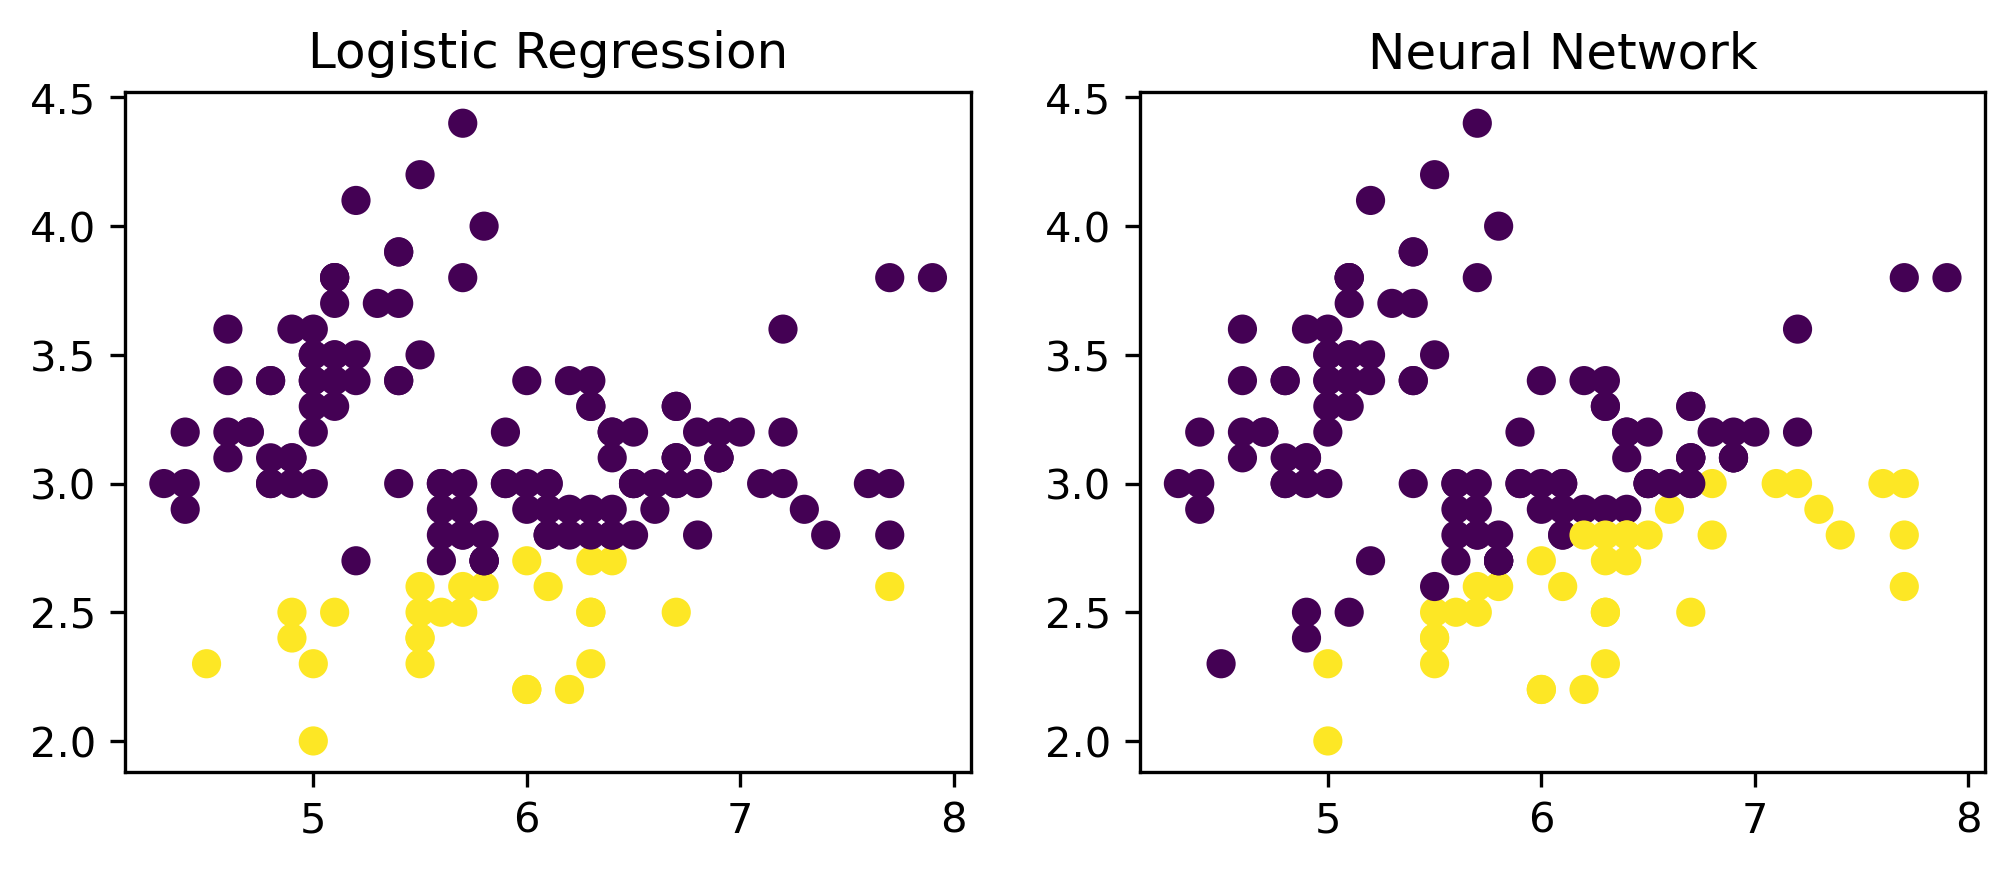

In [12]:
# Compare the distribution of whether Class 1 iris or not
import matplotlib.pyplot as plt

fg, axs = plt.subplots(ncols=2, dpi=300, figsize=(8, 3))

axs[0].scatter(X[:, 0], X[:, 1], c=clf.predict(X))
axs[0].set_title('Logistic Regression')

axs[1].scatter(X[:, 0], X[:, 1], c=nn.predict(X))
axs[1].set_title('Neural Network');

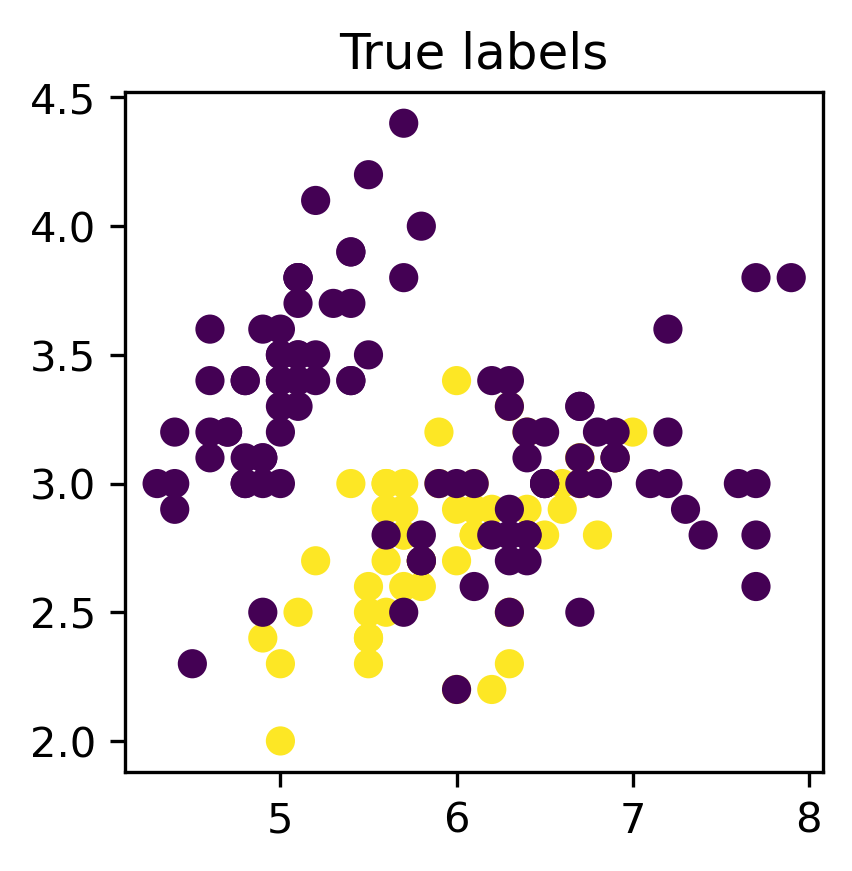

In [13]:
# Actual labels - Logistic Regression looks most similar!
fg, ax = plt.subplots(dpi=300, figsize=(3, 3))
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set_title('True labels');

Stronger regularisation = size of weights is penalised (so they get smaller). leads to less overfitting.

Althought it's pretty hard to overfit with a simple perceptron.

## More Neurons! (aka Multi-layer perceptron)

Now we've got the concept of a neuron and regularisation. Let's build a more complex network.

The multi layer perceptron!!

![mlp](assets/mlp.png)

The layers have handy names:

 1. The input layer -> raw feature data that we feed in
 2. The hidden layers -> one or many internal layers of neurons.
 3. The output layer -> for binary classification we have a single output layer.
 
This network is also **fully connected** because every node of the previous layer inputs into every node of the next layer.

In [15]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(activation='logistic', alpha=1e-1, hidden_layer_sizes=(2,), solver='sgd', max_iter=1000)
nn.fit(X, y)

MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=(2,),
              max_iter=1000, solver='sgd')

In [16]:
nn.coefs_

[array([[-0.17127017,  0.17845851],
        [ 0.54923667,  0.51464019]]),
 array([[-0.09181511],
        [-0.31286996]])]

In [17]:
nn.intercepts_

[array([-0.53229974, -0.23088742]), array([-0.29714138])]

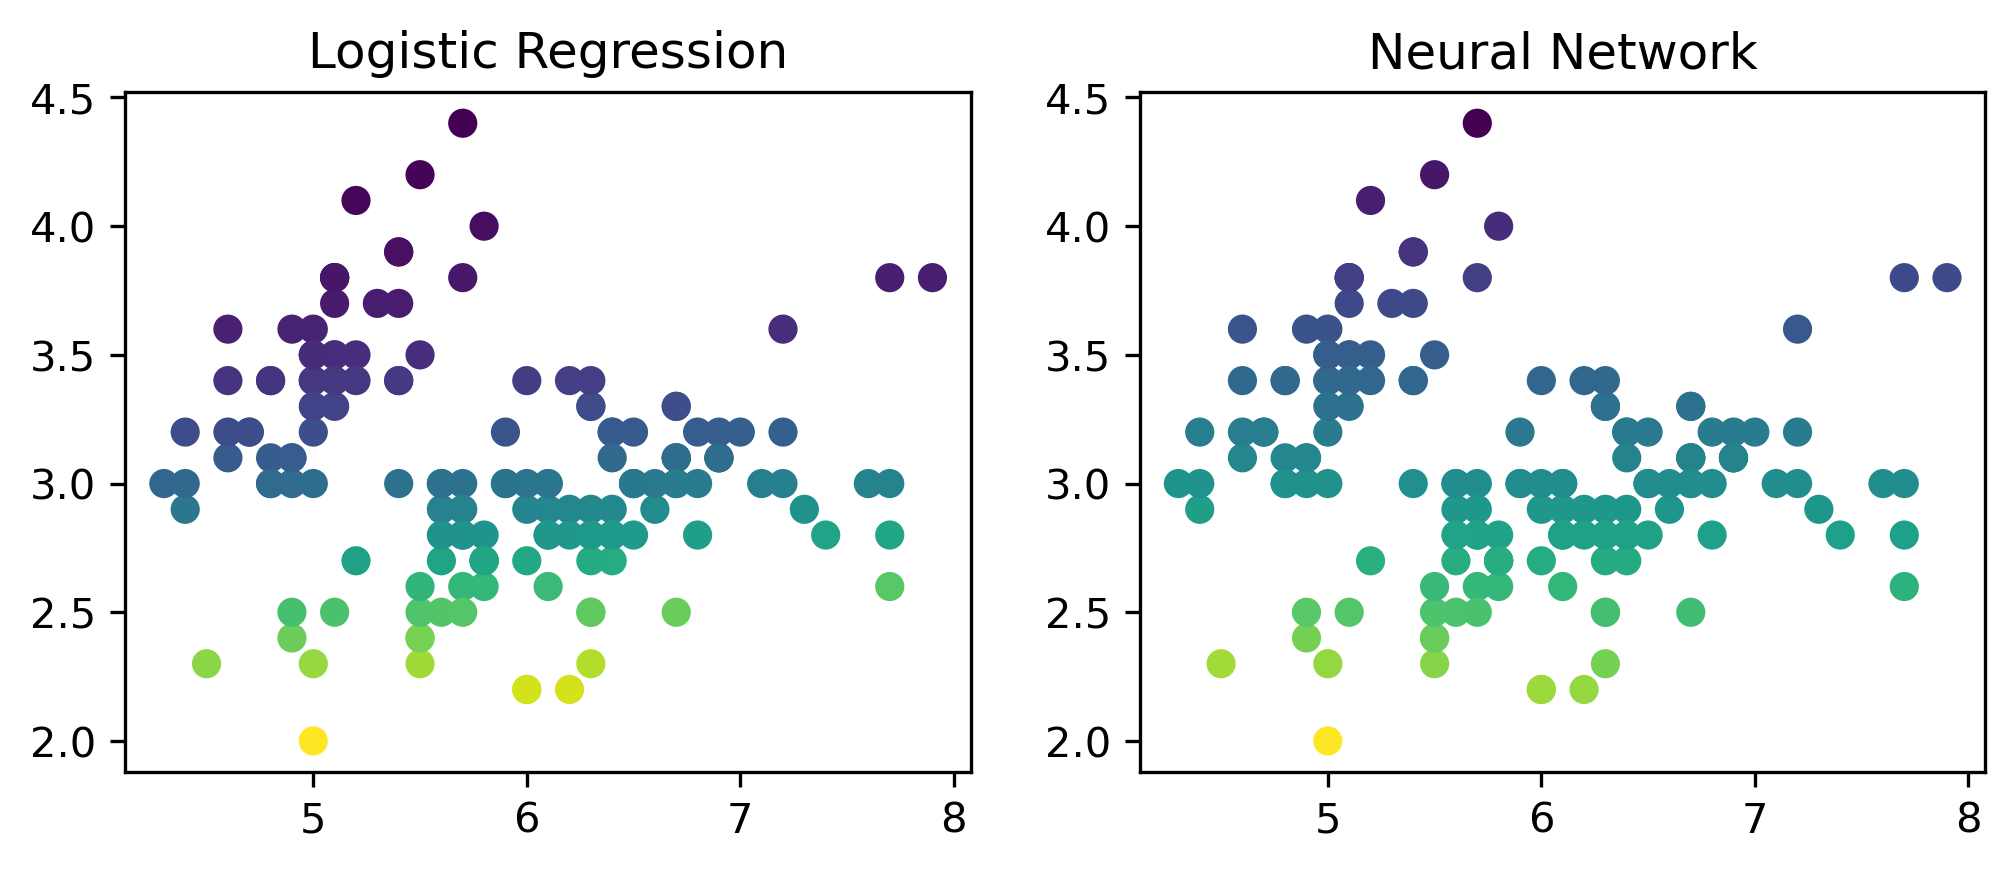

In [18]:
# Visualize distribution of probability of being class 1, coloured by categories  
import matplotlib.pyplot as plt

fg, axs = plt.subplots(ncols=2, dpi=300, figsize=(8, 3))

axs[0].scatter(X[:, 0], X[:, 1], c=clf.predict_proba(X)[:, 1])
axs[0].set_title('Logistic Regression')

axs[1].scatter(X[:, 0], X[:, 1], c=nn.predict_proba(X)[:, 1])
axs[1].set_title('Neural Network');

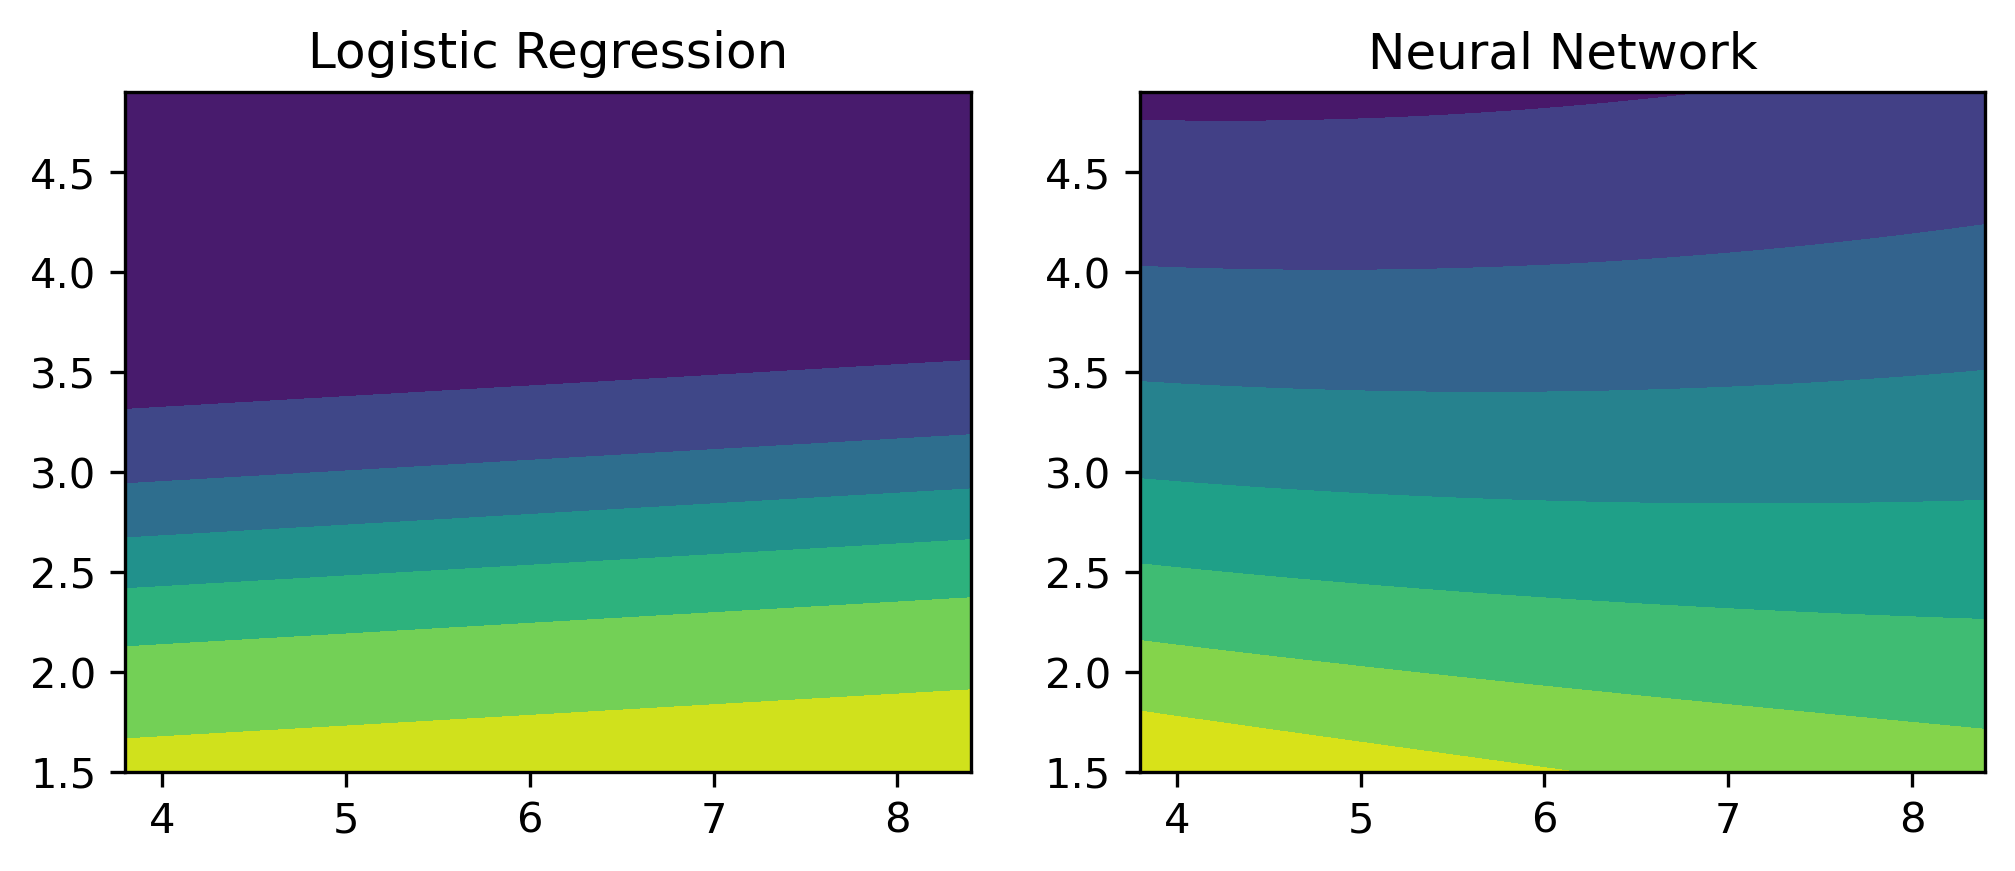

In [19]:
# Visualize decision planes resulting from predicted probability values 
import matplotlib.pyplot as plt

fg, axs = plt.subplots(ncols=2, dpi=300, figsize=(8, 3))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
z = z.reshape(xx.shape)
axs[0].contourf(xx, yy, z)
axs[0].set_title('Logistic Regression')

z = nn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
z = z.reshape(xx.shape)
axs[1].contourf(xx, yy, z)
axs[1].set_title('Neural Network');

**EXERCISE**

Vary the number of nodes in the layer. What happens?

What about alpha?

What about the learning rate?

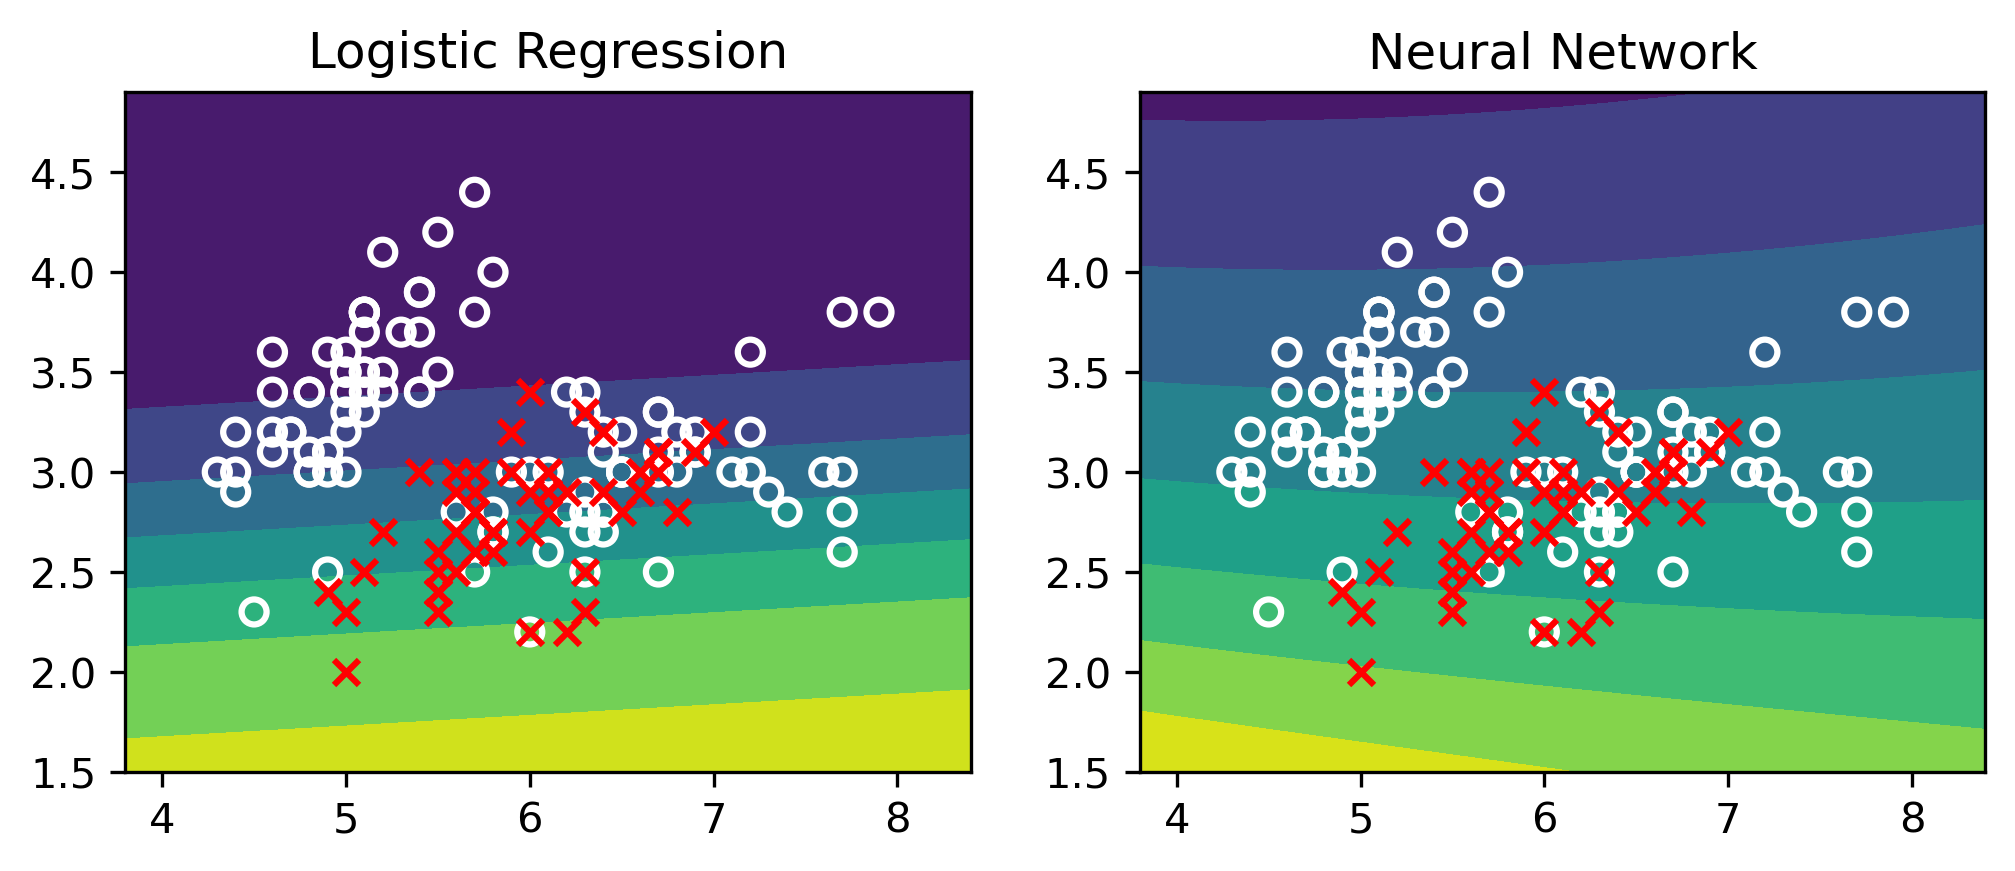

In [20]:
# Visualize distribution of data in decision planes
import matplotlib.pyplot as plt

fg, axs = plt.subplots(ncols=2, dpi=300, figsize=(8, 3))
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
z = z.reshape(xx.shape)
axs[0].contourf(xx, yy, z)
axs[0].scatter(X[~y, 0], X[~y, 1], facecolors='none', edgecolor='w', linewidth=1.5)
axs[0].scatter(X[y, 0], X[y, 1], c='r', marker='x')
axs[0].set_title('Logistic Regression')

z = nn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
z = z.reshape(xx.shape)
axs[1].contourf(xx, yy, z)
axs[1].scatter(X[~y, 0], X[~y, 1], facecolors='none', edgecolor='w', linewidth=1.5)
axs[1].scatter(X[y, 0], X[y, 1], c='r', marker='x')
axs[1].set_title('Neural Network');

If you keep rerunning the code with the same parameters, you'll see that the neural network takes many different shapes. 

That's because the training involves some randomisation.

**Training a neural network leads to different sets of weights depending on how you initialise the network**

**You cannot ever be certain you have the BEST weights**! ☹️

In [27]:
# Use RandomizedSearchCV to tune model for best activation function, alpha value, solver and learning rate parameters
# Default number of neurons per hidden layer is 100
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {'alpha':np.arange(0.0001, 10), 
                  'activation':['logistic', 'tanh', 'relu'], 
                  'solver':['lbfgs', 'sgd', 'adam'], 
                  'learning_rate':['constant', 'invscaling', 'adaptive']}

mlp = MLPClassifier(max_iter=10000, random_state=1)

random_clf = RandomizedSearchCV(mlp, param_distribs, n_iter=10, cv=3)
random_clf.fit(X, y)

print("Best parameter values:", random_clf.best_params_)
print("With best score of:", random_clf.best_score_)

Best parameter values: {'solver': 'lbfgs', 'learning_rate': 'adaptive', 'alpha': 9.0001, 'activation': 'logistic'}
With best score of: 0.6666666666666666


In [48]:
# Set up training and test set for Iris dataset
X_train = X[0:100, :]
X_test = X[-50:, :]

y_train = y[0:100]
y_test = y[-50:]

In [57]:
# Function to test different numbers of neurons per hidden layer
from sklearn.metrics import accuracy_score

def mlp_classify(X_train, y_train, X_test, y_test, num_neurons=2):
    mlp_clf = MLPClassifier(hidden_layer_sizes=(num_neurons,), 
                            activation='logistic', 
                            solver='lbfgs', 
                            alpha=9.0001,  
                            learning_rate='adaptive', 
                            max_iter=1000, 
                            random_state=72, 
                            verbose=True)
    mlp_clf.fit(X_train, y_train)
    predictions = mlp_clf.predict(X_test)
    score = np.round(accuracy_score(y_test, predictions), 2)
    
    print("Accuracy score of predictions:", str(score))
    

In [58]:
mlp_classify(X_train, y_train, X_test, y_test)

Accuracy score of predictions: 1.0


In [59]:
mlp_classify(X_train, y_train, X_test, y_test, num_neurons=4)

Accuracy score of predictions: 0.0


In [60]:
mlp_classify(X_train, y_train, X_test, y_test, num_neurons=100)

Accuracy score of predictions: 0.0


In [66]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(8,), 
                            activation='logistic', 
                            solver='lbfgs', 
                            alpha=9.0001,  
                            learning_rate='adaptive', 
                            max_iter=1000, 
                            random_state=72, 
                            verbose=True)

mlp_clf.fit(X_train, y_train)
mlp_clf.score(X_test, y_test)

1.0

In [67]:
y_pred = mlp_clf.predict(X_test)
score = np.round(accuracy_score(y_test, y_pred), 2)
score

1.0

In [ ]:
# Hmmmmm...

## Regression

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

%matplotlib inline

In [2]:
x = np.random.uniform(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(100) * 0.2

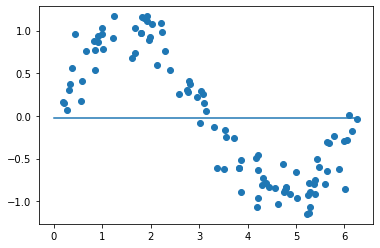

In [3]:
mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(1,))
mlp.fit(np.atleast_2d(x).T, y)

xpred = np.linspace(0, 2*np.pi, 100)
ypred = mlp.predict(np.atleast_2d(xpred).T)

plt.scatter(x, y)
plt.plot(xpred, ypred)

In [10]:
len(x)

100

In [11]:
xpred

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652